# Stream

Computing time comparison between different data structures :
* sparse matrices : CSR, CSC, COO, LIL
* dictionaries : python, cython

To compare these structures, we perform dot-product between sparse matrix and {dense | sparse} vector.

**Libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/Users/simondelarue/Documents/MS_BGD-Telecom_PARIS/Stage/node-embedding/stream'

In [3]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)

In [4]:
def plot_results(df, densities, rows, cols):
    plt.suptitle('Computation time for dot-product between methods (log-scale on right)', weight='bold')
    for i in range(len(rows)):
        df_tmp = df[df['variable']==densities[i]]
        if i%2 != 0:
            sns.boxplot(data=df_tmp, y='value', x='N', hue='method', ax=ax[rows[i], cols[i]], palette="Set2")
            ax[rows[i], cols[i]].set_xlabel('$|V|$')
            ax[rows[i], cols[i]].set_ylabel('Log-scale')
            ax[rows[i], cols[i]].set_yscale('log')
            ax[rows[i], cols[i]].set_title('Log-scale')
        else:
            sns.boxplot(data=df_tmp, y='value', x='N', hue='method', ax=ax[rows[i], cols[i]], palette="Set2")
            ax[rows[i], cols[i]].set_xlabel('$|V|$')
            ax[rows[i], cols[i]].set_ylabel(f'Density={densities[i]}', weight='bold')
            ax[rows[i], cols[i]].set_title('Linear scale')

## Plots

### 1. $A.v$ with $v$ sparse

**All methods**

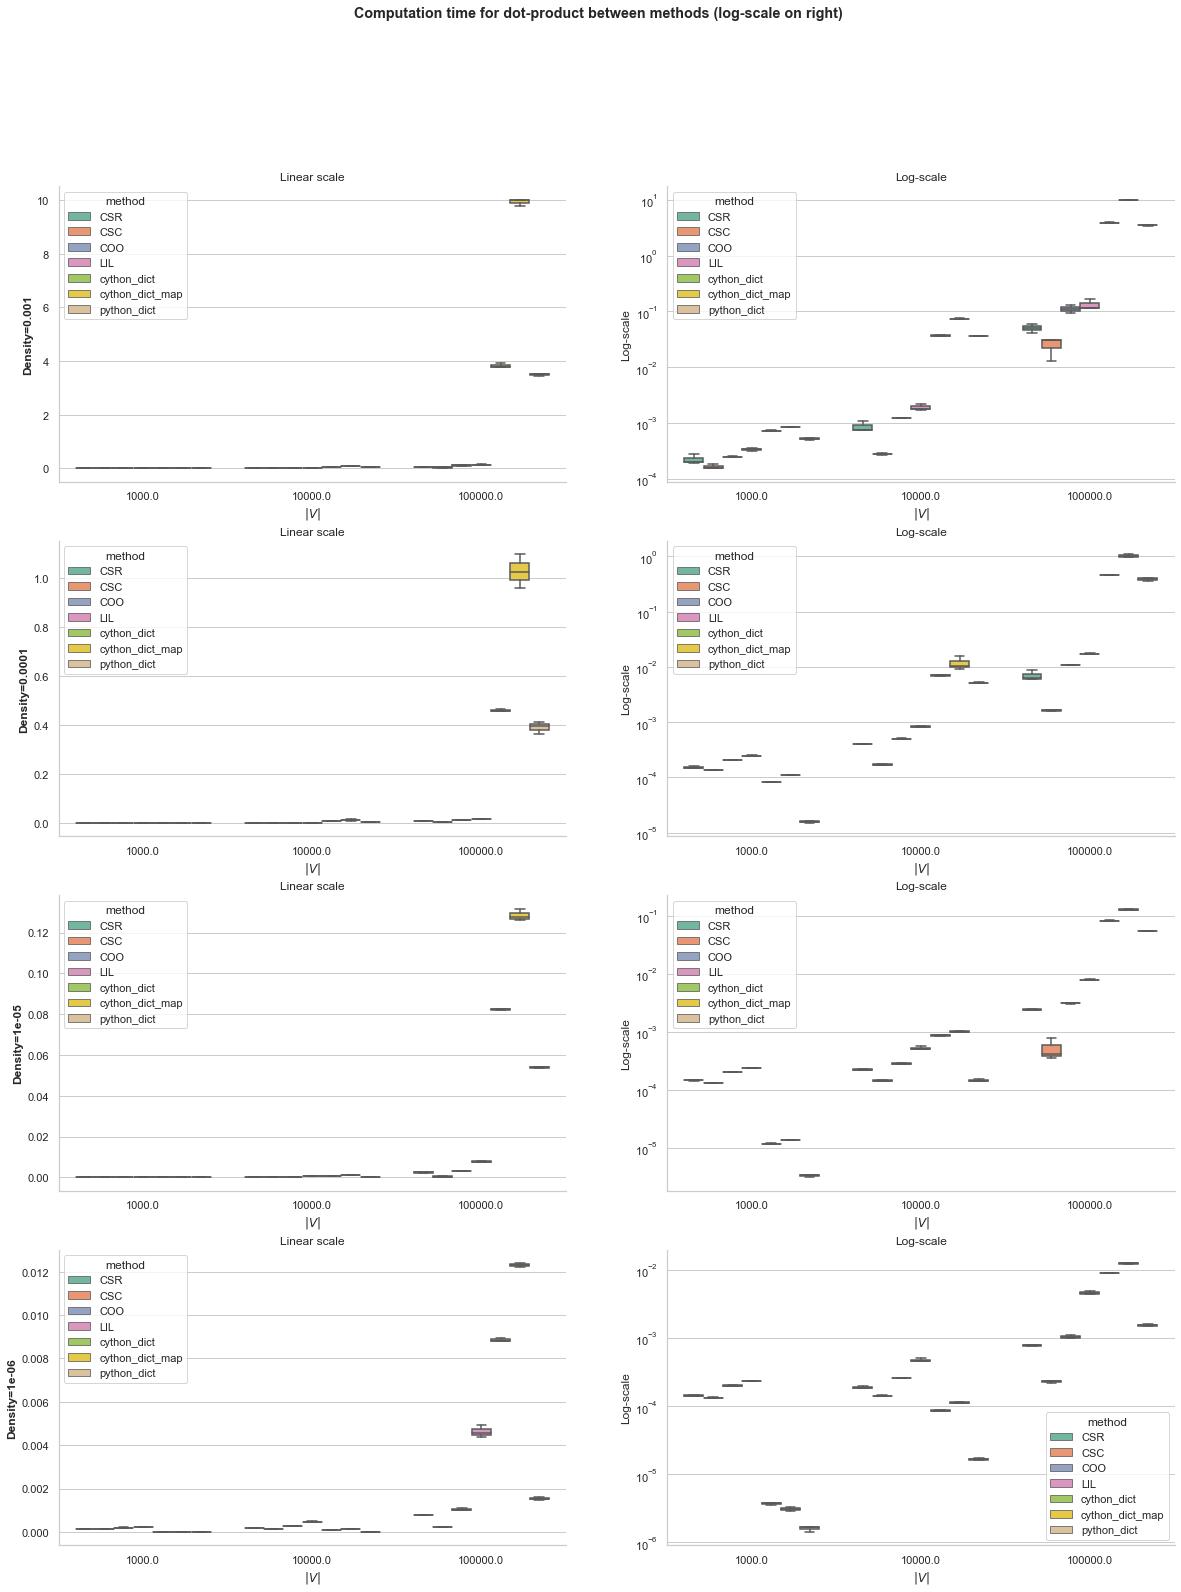

In [155]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_sparse_v.pkl')

# Plot
fig, ax = plt.subplots(4, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2, 3, 3]
cols = [0, 1, 0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

**Without dict map**

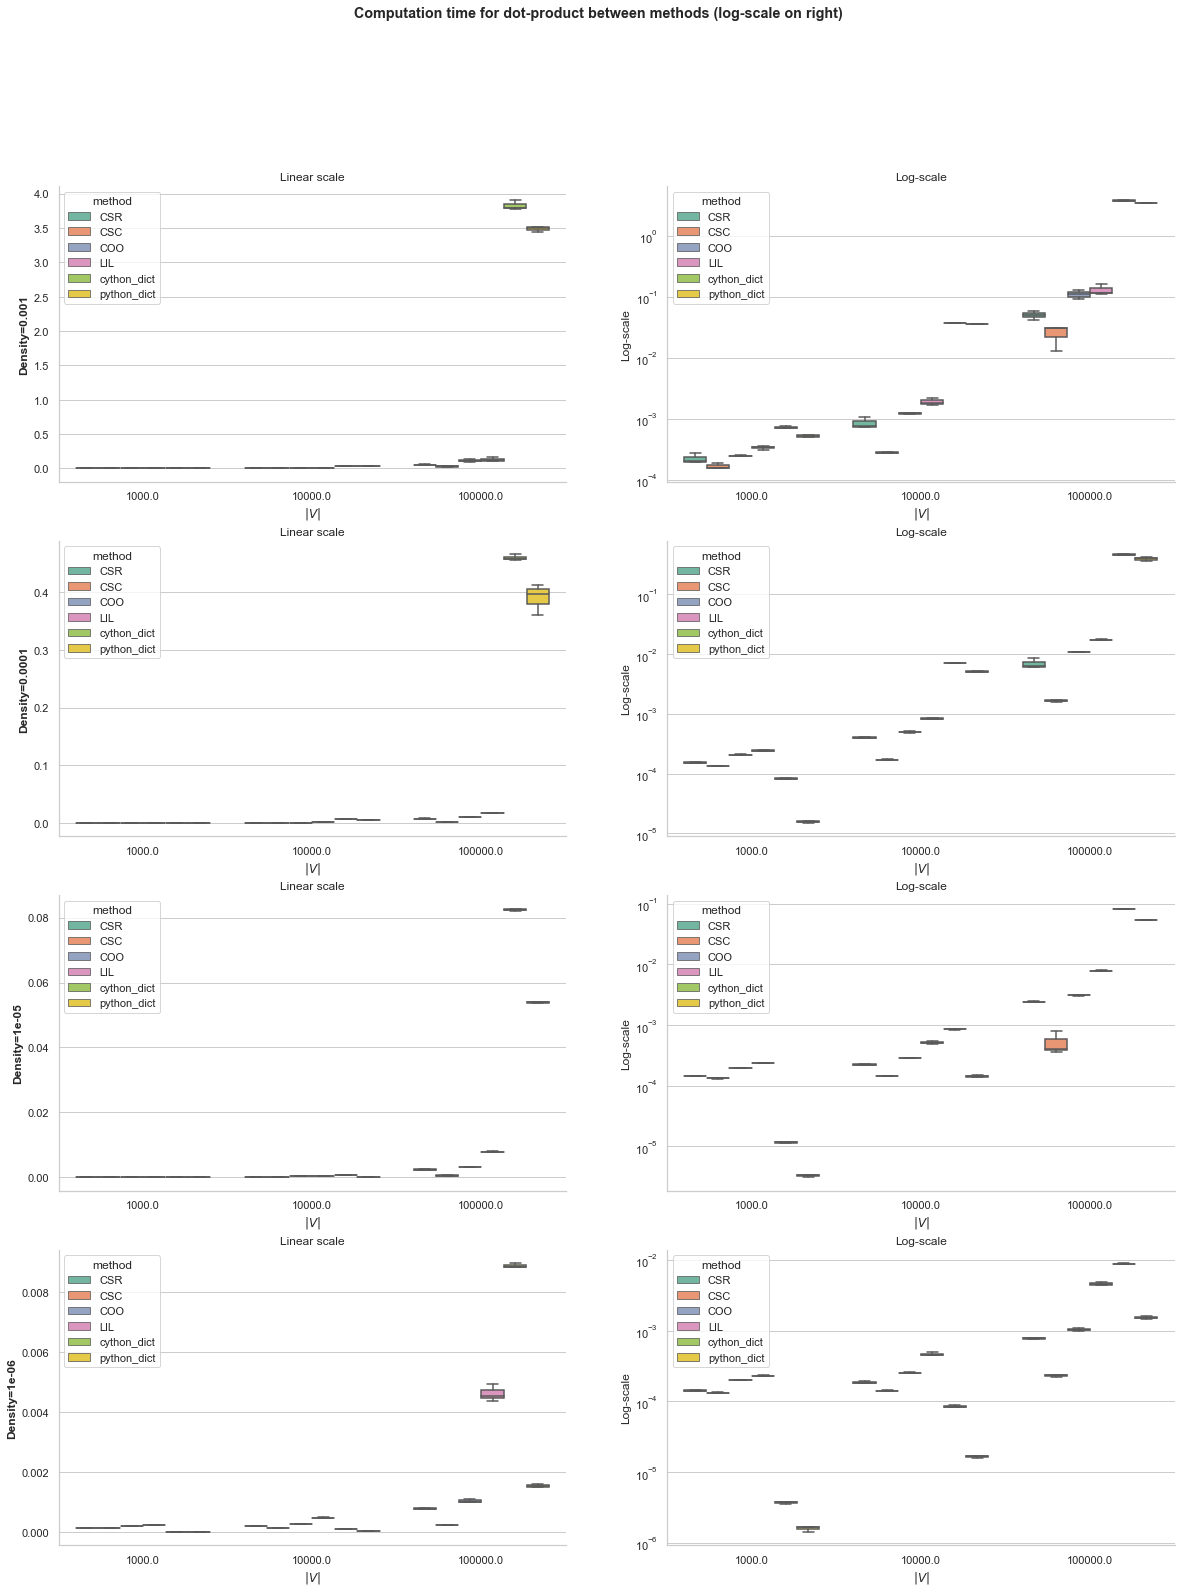

In [159]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_sparse_v.pkl')
df = df[~df['method'].isin(['cython_dict_map'])]

# Plot
fig, ax = plt.subplots(4, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2, 3, 3]
cols = [0, 1, 0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

**Without dicts**

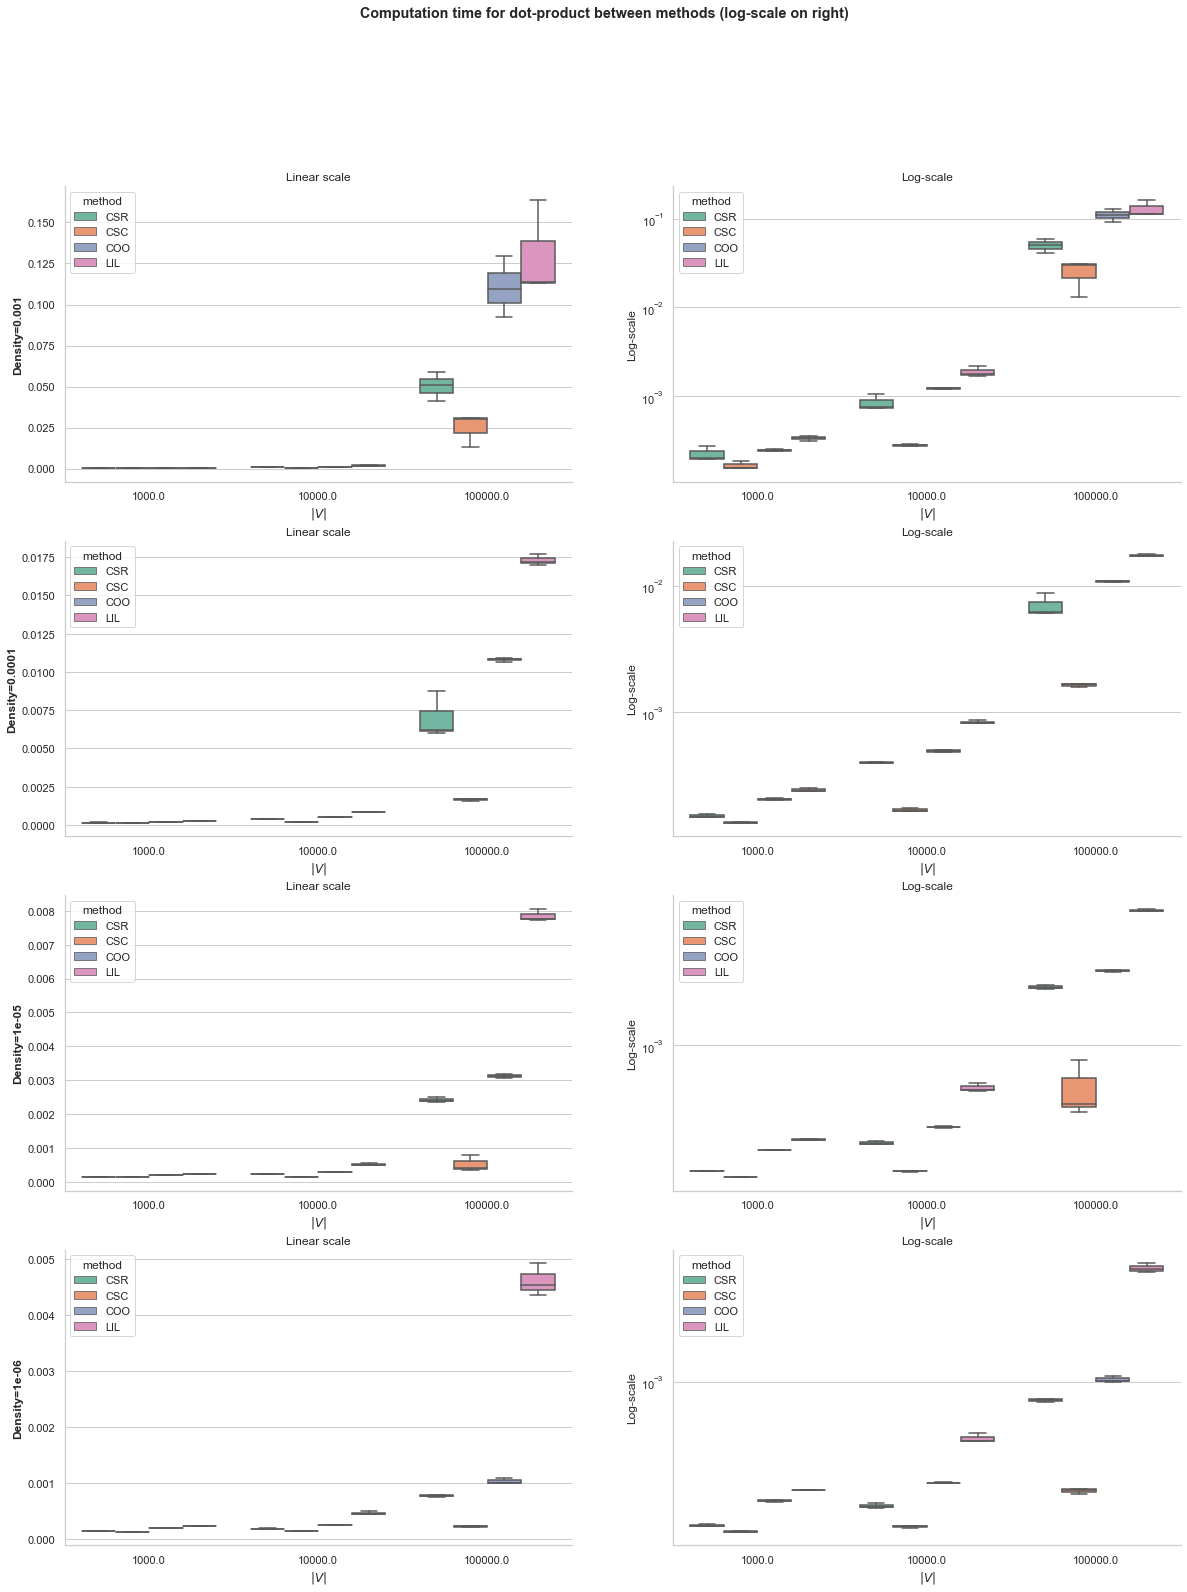

In [161]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_sparse_v.pkl')
df = df[~df['method'].isin(['cython_dict_map', 'python_dict', 'cython_dict'])]

# Plot
fig, ax = plt.subplots(4, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2, 3, 3]
cols = [0, 1, 0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

### 2. $A.v$ with $v$ dense

**All methods**

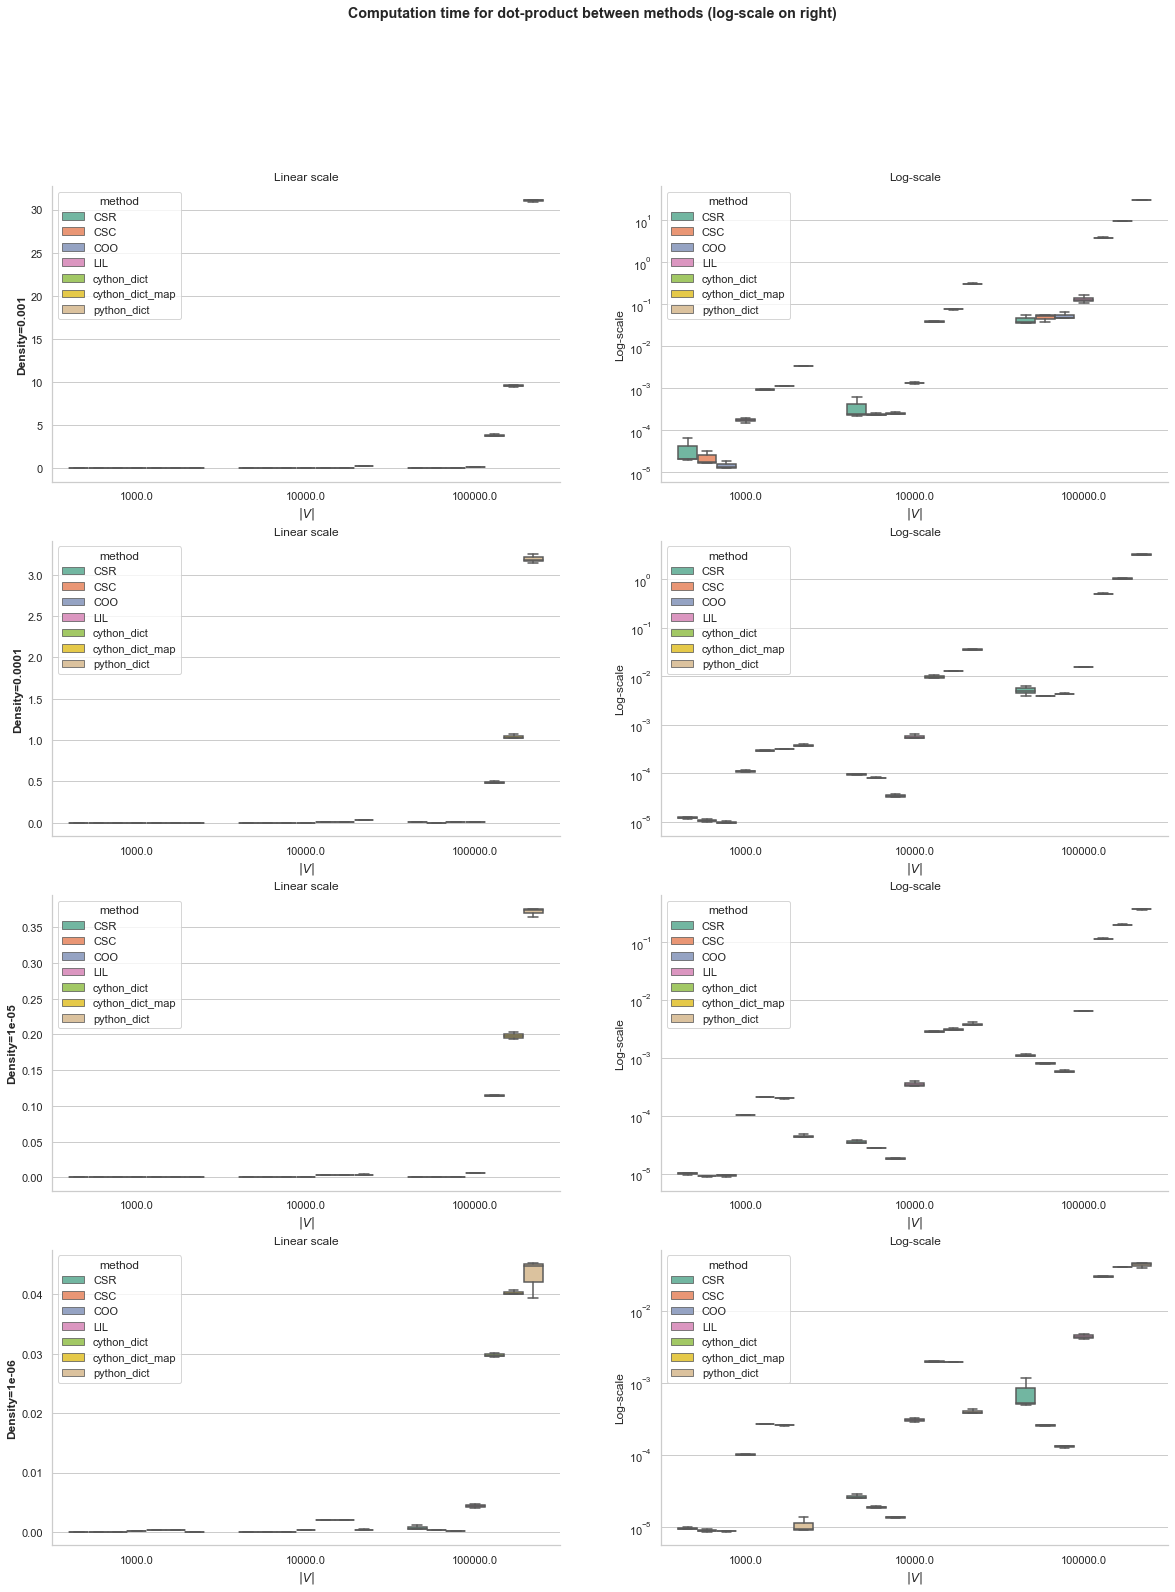

In [160]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_dense_v.pkl')

# Plot
fig, ax = plt.subplots(4, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2, 3, 3]
cols = [0, 1, 0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

**Without dicts**

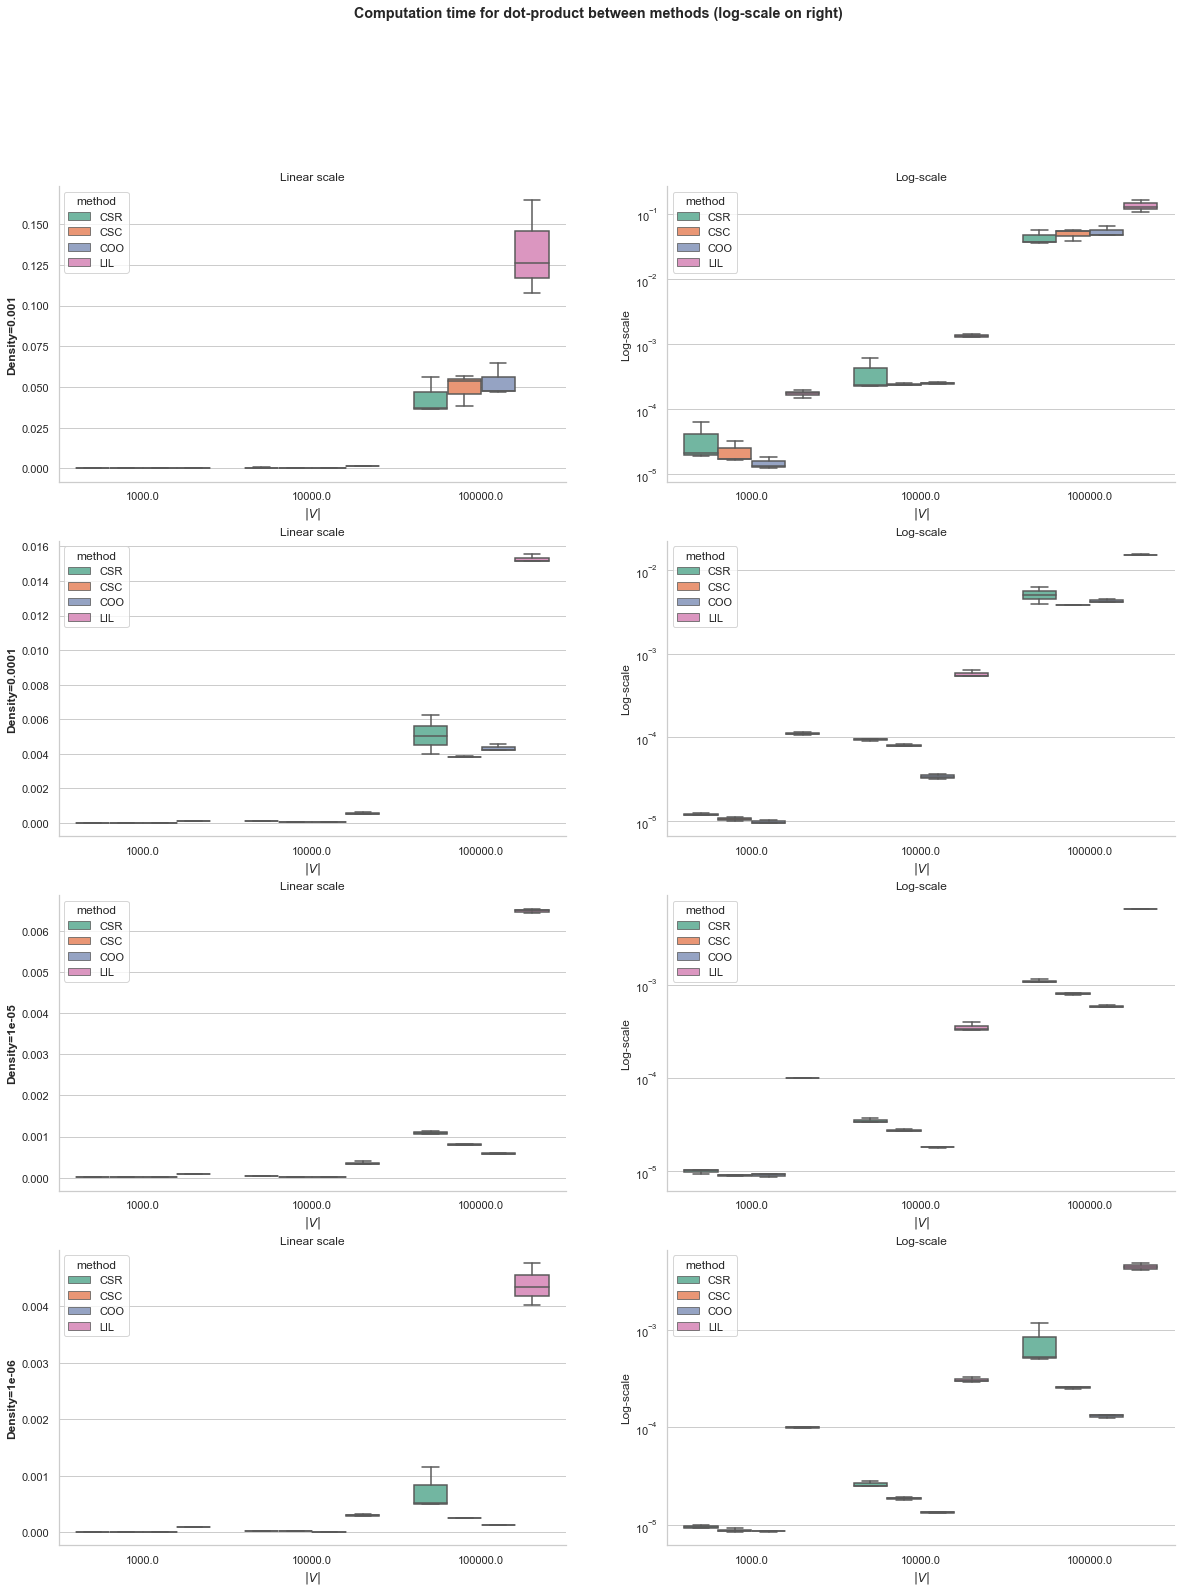

In [162]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_dense_v.pkl')
df = df[~df['method'].isin(['cython_dict_map', 'python_dict', 'cython_dict'])]

# Plot
fig, ax = plt.subplots(4, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2, 3, 3]
cols = [0, 1, 0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

### Shuffled COO

**$A*v$ with $v$ sparse - Without dict**

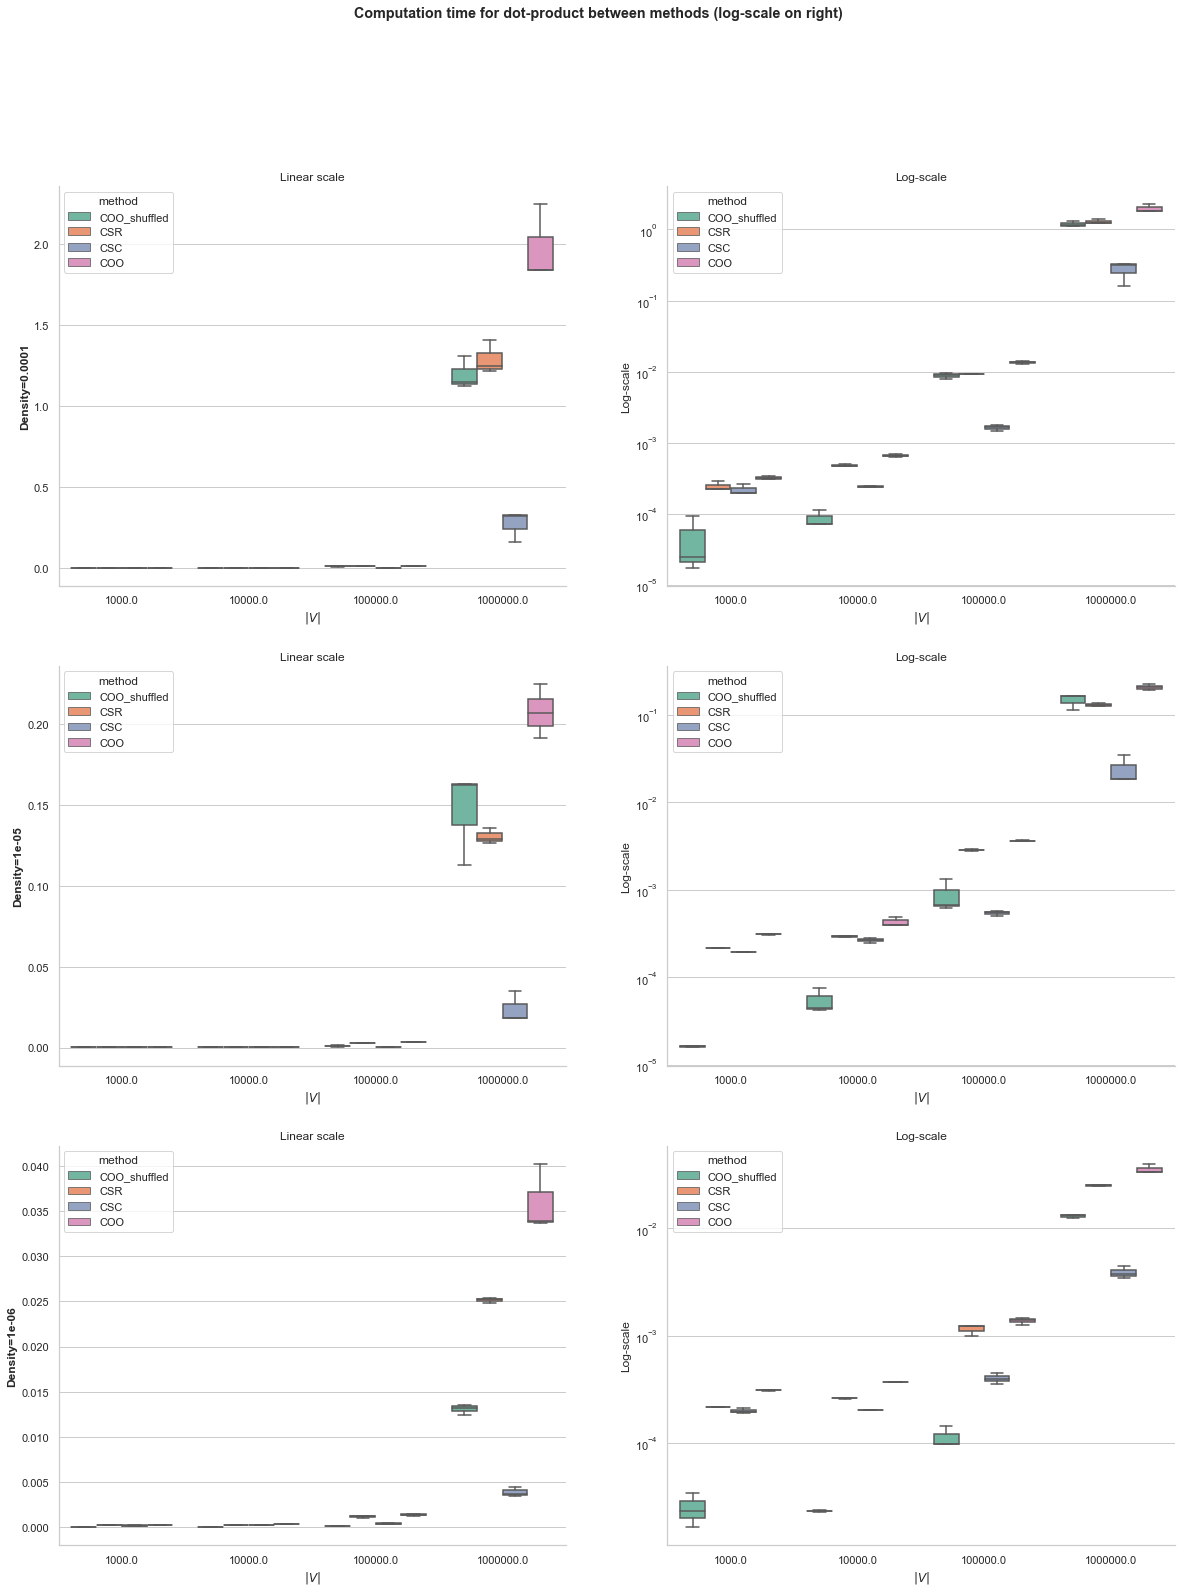

In [12]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_sparse_v_shuff.pkl')
df = df[~df['method'].isin(['cython_dict', 'python_dict'])]

# Plot
fig, ax = plt.subplots(3, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2]
cols = [0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

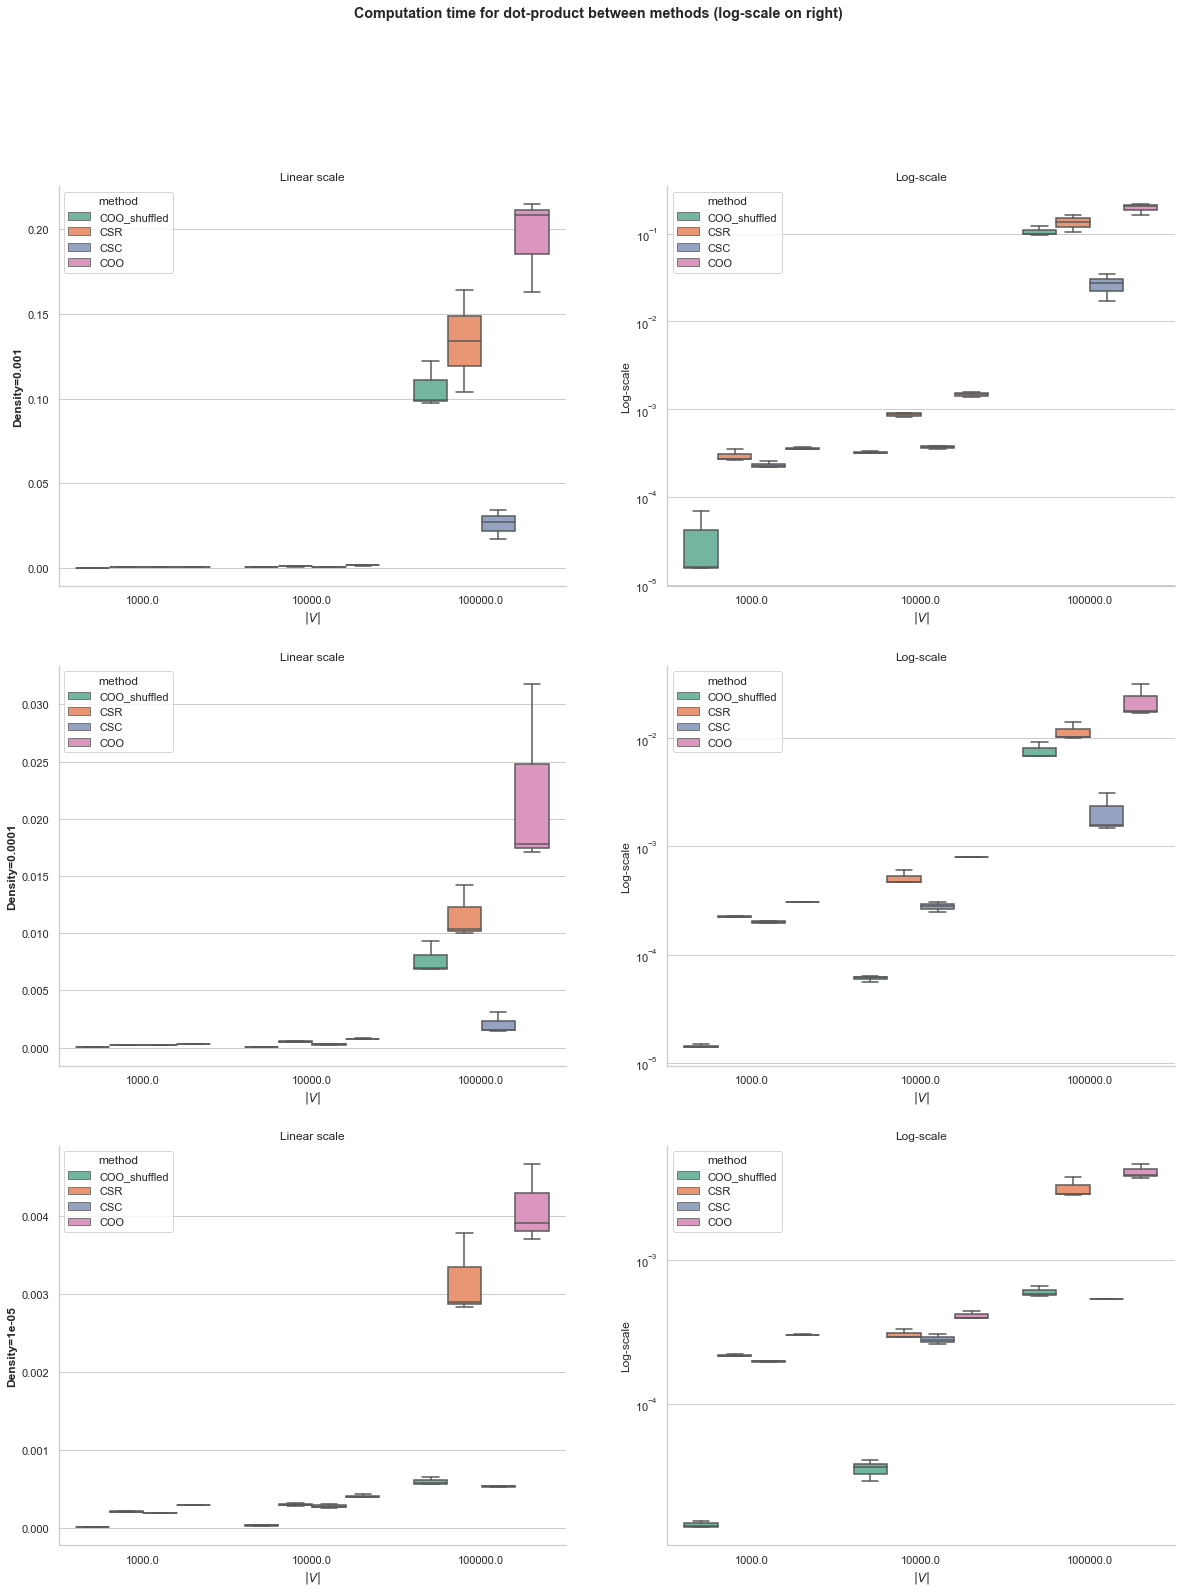

In [11]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_sparse_v_shuff.pkl')
df = df[~df['method'].isin(['cython_dict', 'python_dict'])]

# Plot
fig, ax = plt.subplots(3, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2]
cols = [0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

## Annexes

With more dense matrices.

**$A.v$ with $v$ sparse**

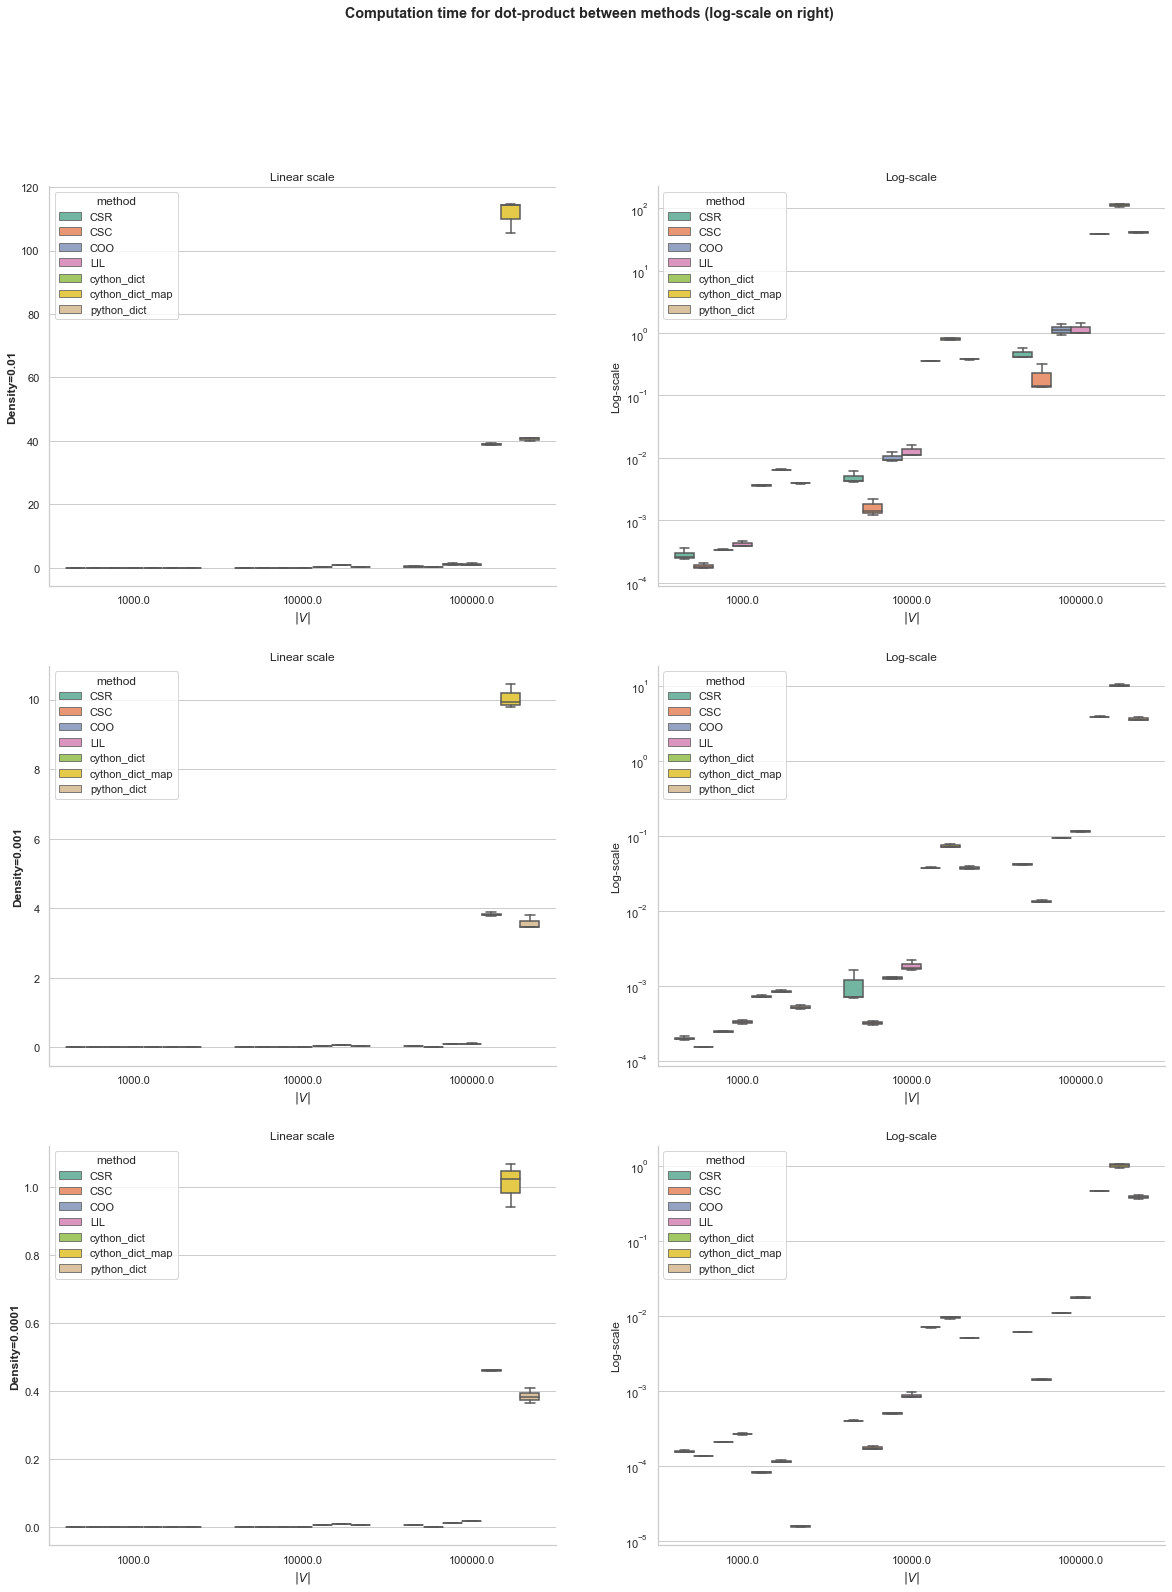

In [174]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_sparse_v.pkl')

# Plot
fig, ax = plt.subplots(3, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2]
cols = [0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

**$A.v$ with $v$ dense**

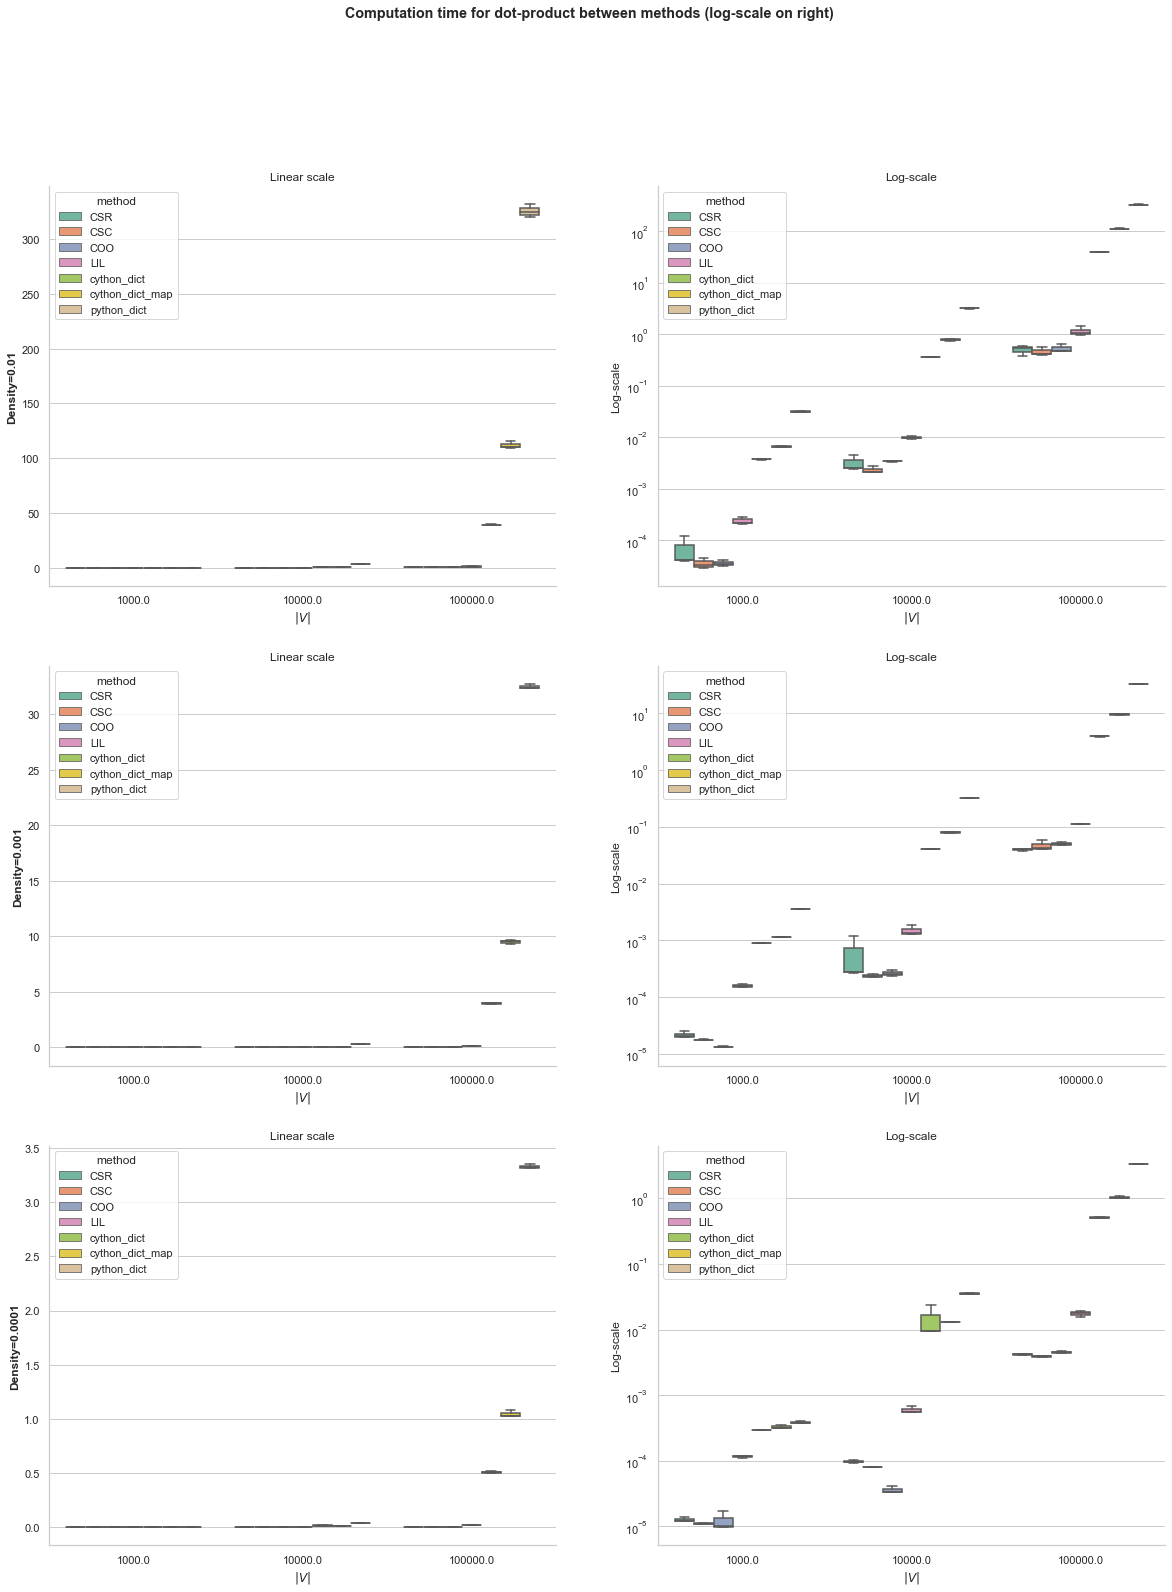

In [164]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_dense_v.pkl')

# Plot
fig, ax = plt.subplots(3, 2, figsize=(20, 25))

rows = [0, 0, 1, 1, 2, 2]
cols = [0, 1, 0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

### Larger datasets

**$A.v$** with sparse $v$

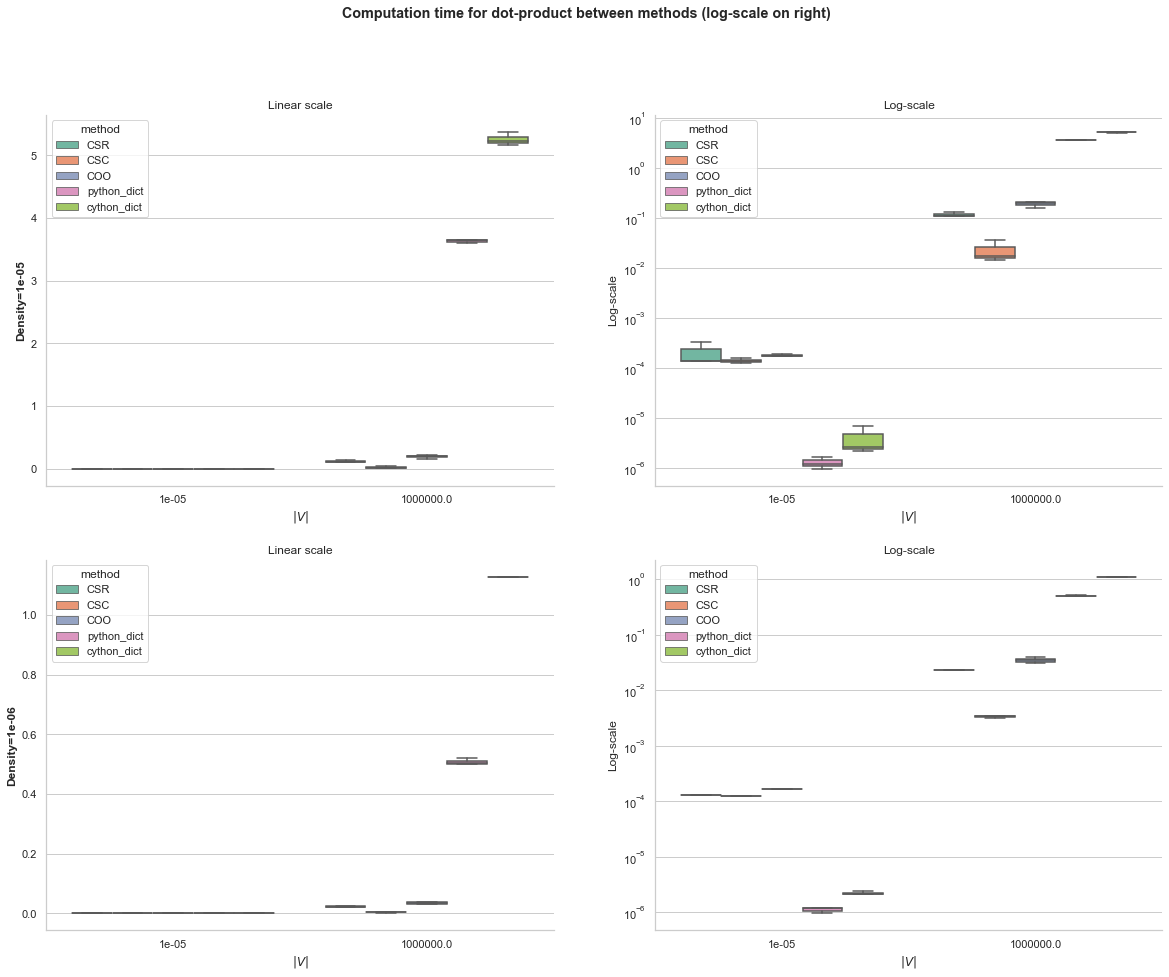

In [183]:
# Load data
df = pd.read_pickle(f'{path}/res_plot_full_sparse_v_LARGE.pkl')

# Plot
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

rows = [0, 0, 1, 1]
cols = [0, 1, 0, 1]
densities = np.array([[val, val] for val in df['variable'].unique()]).ravel()

plot_results(df, densities, rows, cols)

## Sandbox

In [102]:
A = create_sparse_matrix(1000, 0.01)
#print(A.todense())
v = np.random.randn(A.shape[0])
#print(v)

In [103]:
# Numpy
print('CSR : ', A.dot(v).sum().sum())

# Coo
print('COO : ', A.tocoo().dot(v).sum().sum())

CSR :  101.40244029463169
COO :  101.40244029463169


In [71]:
A_dense = np.array([[0, 0, 0, 0, 0],
                        [0, 0, 0, 1, 1],
                        [0, 0, 1, 0, 0],
                        [1, 0, 1, 0, 0],
                        [0, 0, 0, 0, 0]])

In [91]:
from scipy.sparse.csr import csr_matrix
A_sparse = (csr_matrix(A_dense))

In [76]:
from scipy.sparse.coo import coo_matrix
coo_matrix(A_dense)

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in COOrdinate format>

In [92]:
A_sparse.tocoo()

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in COOrdinate format>

In [77]:
v = {0: 0.5, 1: 1, 2: 0.5, 3: 2, 4: 1}

In [82]:
coo_matrix(np.array([0.5, 1, 0.5, 2, 1])).todense()

matrix([[0.5, 1. , 0.5, 2. , 1. ]])

In [86]:
A_coo = coo_matrix(A_dense)
my_v = coo_matrix(np.array([0.5, 1, 0.5, 2, 1]))

print(f'A shape : {A_coo.shape}')
print(f'v shape : {my_v.shape}')

A shape : (5, 5)
v shape : (1, 5)


In [90]:
print('res :\n', A_coo.dot(my_v.T))

res :
   (1, 0)	3.0
  (2, 0)	0.5
  (3, 0)	1.0


In [110]:
from scipy.sparse.csc import csc_matrix
A_csc = csc_matrix(A_dense)
my_v = csc_matrix(np.array([0.5, 1, 0.5, 2, 1]))

print(f'A shape : {A_csc.shape}')
print(f'v shape : {my_v.shape}')

print('res :\n', A_csc.dot(my_v.T))
print(A_csc.dot(np.array([0.5, 1, 0.5, 2, 1])))

A shape : (5, 5)
v shape : (1, 5)
res :
   (1, 0)	3.0
  (2, 0)	0.5
  (3, 0)	1.0
[0.  3.  0.5 1.  0. ]


In [107]:
print(A_csc)

  (3, 0)	1
  (2, 2)	1
  (3, 2)	1
  (1, 3)	1
  (1, 4)	1


In [136]:
import scipy

def create_sparse_matrix(n, density):
    m = n
    size = int(n * m * density)
    rows = np.random.randint(0, n, size=size)
    cols = np.random.randint(0, m, size=size)
    data = np.random.randint(1, 2, size)
    return sparse.csr_matrix((data, (rows, cols)), shape=(n, m))

A_csr = create_sparse_matrix(1000, 0.01)
v = scipy.sparse.random(A_csr.shape[0], 1, density=0.01)
print(v.shape)
print(v.sum().sum())

print('CSR : ', A_csr.dot(v).sum().sum())

A_coo = A_csr.tocoo()
print('COO : ', A_coo.dot(v).sum().sum())

A_csc = A_csr.tocsc()
print('COO : ', A_csc.dot(v).sum().sum())

A_lil = A_csr.tolil()
print('COO : ', A_lil.dot(v).sum().sum())

(1000, 1)
4.719428758920263
CSR :  46.704247106404296
COO :  46.704247106404296
COO :  46.704247106404296
COO :  46.704247106404296


In [151]:
res = {}
for k, i in enumerate(v.todense()):
    if i != 0:
        res[k] = i[0, 0]
res

{99: 0.1645664638446538,
 487: 0.9441218976517001,
 630: 0.016852217177346418,
 642: 0.7356398203205977,
 678: 0.0028609505337559016,
 724: 0.4793077117306883,
 804: 0.5470630992691655,
 817: 0.3413559388883478,
 865: 0.7785166930766029,
 934: 0.7091439664274055}

In [152]:
len(res)

10

In [179]:
print(csr_matrix(A_dense).tolil())

  (1, 3)	1
  (1, 4)	1
  (2, 2)	1
  (3, 0)	1
  (3, 2)	1


In [181]:
print(csr_matrix(A_dense))

  (1, 3)	1
  (1, 4)	1
  (2, 2)	1
  (3, 0)	1
  (3, 2)	1
